## Capstone Project

**Research title:** 

Application of Machine Learning algorithms to evaluate the changes in energy consumption for Data Centres and subsequently the impact on consumer behaviour in the commercial sector.  


## 1. EDA Analysis

All the different stages of EDA analysis are going to be covered

## **1.1. Data Cleaning**

In [1]:
#Import the libraries

import matplotlib
matplotlib.use("TkAgg")
import pandas as pd
import seaborn as sns
import numpy as np
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from matplotlib import pyplot as plt 
%matplotlib inLine
sns.set(color_codes=True) 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
Centers = pd.read_csv('MEC02.20240304T160327.csv')

In [3]:
# Visualizing the first 5 rows
Centers.head()

,Statistic Label,Quarter,Electricity Consumption,UNIT,VALUE
0,Gigawatt hours,2015Q1,Data centres,GWh,290
1,Gigawatt hours,2015Q2,Data centres,GWh,302
2,Gigawatt hours,2015Q3,Data centres,GWh,315
3,Gigawatt hours,2015Q4,Data centres,GWh,328
4,Gigawatt hours,2016Q1,Data centres,GWh,339


In [4]:
# Checking shape of the dataset
Centers.shape

(32, 5)

In [5]:
#Categorical values and the number of times those values appear in the dataset. 
#This shows us the number of categories for each cathegorical value
Centers.describe(include=object)
#construction.describe(include=object)

,Statistic Label,Quarter,Electricity Consumption,UNIT
count,32,32,32,32
unique,1,32,1,1
top,Gigawatt hours,2015Q1,Data centres,GWh
freq,32,1,32,32


In [6]:
# Column "Statistic Label" and "Unit" will be dropped as it only contains the word "Data Centres" and 
# Gigawatt hours in each row and it will not produce any relevant information for my analysis.

#Dropping "Statistic Label" and "unit" features. 
Centers = Centers.drop(['Statistic Label', 'Electricity Consumption', 'UNIT'], axis=1)
#Renaming the columns value and date.
Centers = Centers.rename(columns={"VALUE": "Data Centres Value"})
#exports = exports.rename(columns={"Value": "exports", "Date": "year"})

In [7]:
# Checking the dataset after dropping those features
Centers.head()

,Quarter,Data Centres Value
0,2015Q1,290
1,2015Q2,302
2,2015Q3,315
3,2015Q4,328
4,2016Q1,339


In [8]:
# Checking data types
Centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Quarter             32 non-null     object
 1   Data Centres Value  32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 644.0+ bytes


In [9]:
# Checking for null values
Centers.isnull().sum()

Quarter               0
Data Centres Value    0
dtype: int64

In [10]:
# Loading second dataset for all other consumers but Data Centres to make comparisons
Other_consumers = pd.read_csv('MEC02.20240317T130301.csv')

In [11]:
# Checking first 5 rows
Other_consumers.head()

,Statistic Label,Quarter,Electricity Consumption,UNIT,VALUE
0,Gigawatt hours,2015Q1,Customers other than data centres,GWh,6275
1,Gigawatt hours,2015Q2,Customers other than data centres,GWh,5784
2,Gigawatt hours,2015Q3,Customers other than data centres,GWh,5468
3,Gigawatt hours,2015Q4,Customers other than data centres,GWh,5837
4,Gigawatt hours,2016Q1,Customers other than data centres,GWh,6312


In [12]:
# Column "Statistic Label" and "Unit" will be dropped as it only contains the word "Customers other than data centres and 
# Gigawatt hours in each row and it will not produce any relevant information for my analysis.

#Dropping "Statistic Label" and "unit" features. 
Other_consumers = Other_consumers.drop(['Statistic Label', 'Electricity Consumption', 'UNIT'], axis=1)
#Renaming the columns value and date.
Other_consumers = Other_consumers.rename(columns={'VALUE': 'Customers other than Data Centers Value'})

In [13]:
Other_consumers.head()

,Quarter,Customers other than Data Centers Value
0,2015Q1,6275
1,2015Q2,5784
2,2015Q3,5468
3,2015Q4,5837
4,2016Q1,6312


In [14]:
#Creating new dataframe "const" to merge the first two datasets: "exports and imports"
#through outer merge.
Data_Centers = pd.merge(Centers, Other_consumers, how="outer")

In [15]:
#Visualizing data set after merging
Data_Centers.head()

,Quarter,Data Centres Value,Customers other than Data Centers Value
0,2015Q1,290,6275
1,2015Q2,302,5784
2,2015Q3,315,5468
3,2015Q4,328,5837
4,2016Q1,339,6312


In [16]:
# Find some of the summary statistics of the database for the numerical features.
Data_Centers.describe()

,Data Centres Value,Customers other than Data Centers Value
count,32.000000,32.000000
mean,668.406250,6018.375000
std,329.757962,353.598437
min,290.000000,5468.000000
25%,402.250000,5737.750000
50%,582.500000,5998.000000
75%,866.500000,6284.250000
max,1450.000000,6711.000000


In [17]:
#Categorical values and the number of times those values appear in the dataset. 
#This shows us the number of categories for each cathegorical value
Data_Centers.describe(include=object)

,Quarter
count,32
unique,32
top,2015Q1
freq,1


In [18]:
# Checking data types
Data_Centers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Quarter                                  32 non-null     object
 1   Data Centres Value                       32 non-null     int64 
 2   Customers other than Data Centers Value  32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


In [19]:
# Checking for null values
Data_Centers.isnull().sum()

Quarter                                    0
Data Centres Value                         0
Customers other than Data Centers Value    0
dtype: int64

In [20]:
#checking the duplicates in the dataset
duplicate_rows=Data_Centers[Data_Centers.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (0, 3)


In [21]:
# Sub-setting construction dataset to get my sample population for "Ireland"
#test_df=construction[construction["country"]=="Ireland"]
#test_df.head(5)

test_df=Data_Centers[Data_Centers["Quarter"]=="2022Q3"]
test_df.head(10)

,Quarter,Data Centres Value,Customers other than Data Centers Value
30,2022Q3,1329,5642


In [22]:
#Sub-setting again the construcion dataset to get only imports for Ireland
# Ireland imports is my sample population
#Ireland_imports=test_df[["imports"]]
#Ireland_imports.head()

In [23]:
#g = sns.catplot('Data Centres Value', kind="count", data='Data_Centers', aspect=1);
#g.set_xticklabels(rotation=90);
#g.tick_params(axis='x', labelrotation=90)
#g.set(title='Electricity Consumption');

In [24]:
# Visualizing Electricity Consumption of Non Residential clients through a Boxplot:
#g = sns.set(rc={"figure.figsize":(9, 7)})
#g.tick_params(axis='x', labelrotation=90)
#g = sns.boxplot(data=Data_Centers, x="Data Centres Value", y="Customers other than Data Centers Value")
#plt.title('Box plot of Electricity Consumption of Non Residential Clients by year',
          #fontsize=13);

In [25]:
#ax = sns.catplot("Data Centres Value", aspect=1.5, data=Data_Centers, kind="count", color="b") 
#sns.catplot("Data Centres Value", data='Data_Centers.Quarter', kind="count")

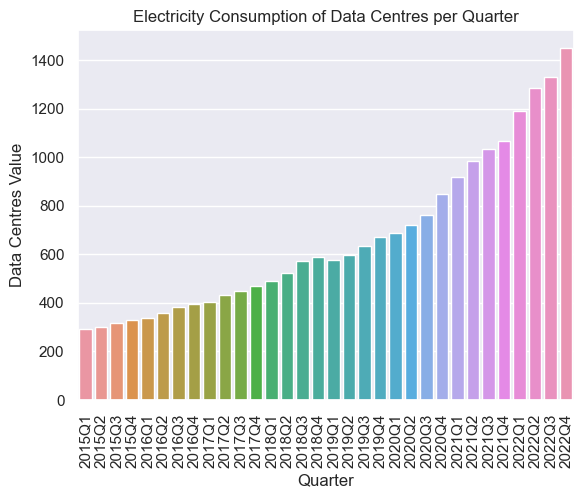

In [26]:
ax = sns.barplot(x="Quarter",y="Data Centres Value",data=Data_Centers,estimator=np.mean) # confidende
#ax.set_xticklabels(rotation=90);
ax.tick_params(axis='x', labelrotation=90)
ax.set(title='Electricity Consumption of Data Centres per Quarter');

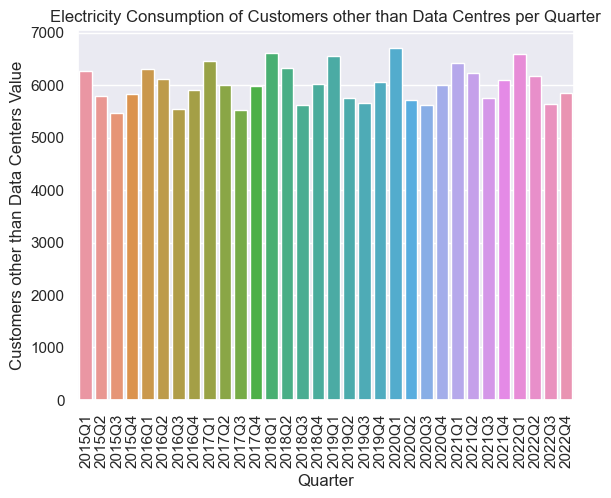

In [27]:
ax = sns.barplot(x="Quarter",y="Customers other than Data Centers Value",data=Data_Centers,estimator=np.mean) # confidende
#ax.set_xticklabels(rotation=90);
ax.tick_params(axis='x', labelrotation=90)
ax.set(title='Electricity Consumption of Customers other than Data Centres per Quarter');

In [28]:
#g = sns.catplot('Residential Values', data=Meters, kind="count", aspect=3);
#g.set_xticklabels(rotation=90);
#g.set(title='Electricity Consumption');

#g = sns.catplot('Data Centres Values', data=Data_Centers, kind="count", aspect=3);
#g.set_xticklabels(rotation=90);
#g.set(title='Electricity Consumption');

#g = sns.catplot('Sport', data=olympics_top_sports_winners_2016, kind="count", aspect=1.5);
#g.set(title='Count of medals awarded in each of the top sports');

#g = sns.catplot('Counties & Dublin Postal Districts', data=Meters, kind="count", aspect=1.5);
#g.set(title='Count of medals awarded in each of the top sports');

## 1.2. Correlation of the variables

In [29]:
# Checking the correlation between variables
correlation = Data_Centers.corr()
print(correlation)

                                         Data Centres Value  \
Data Centres Value                                 1.000000   
Customers other than Data Centers Value            0.062107   

                                         Customers other than Data Centers Value  
Data Centres Value                                                      0.062107  
Customers other than Data Centers Value                                 1.000000  


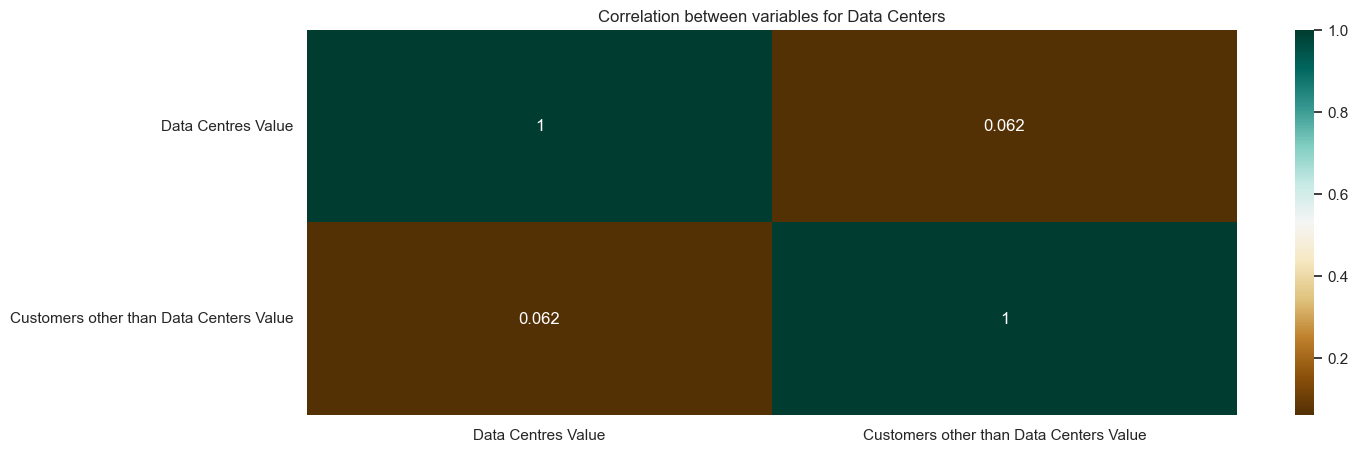

In [30]:
# Finding the relations between the variables through a heat map
plt.figure(figsize=(15,5)) 
c= Data_Centers.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 
plt.title("Correlation between variables for Data Centers");
#there is a weak correlation of 0.062 Data Centres and Other customers than Data Centres

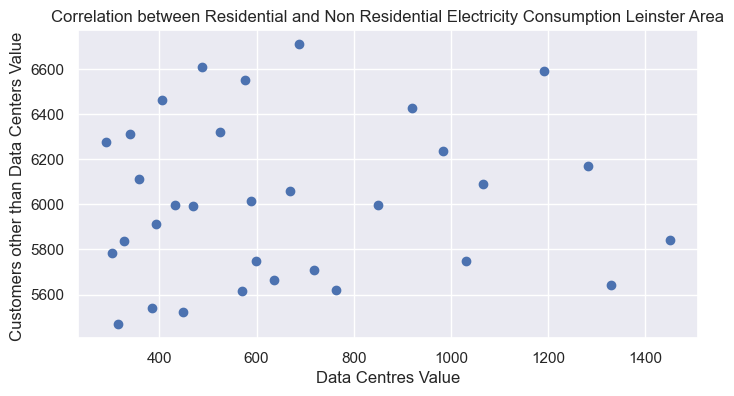

In [31]:
#Ploting a scatter plot to stablish if there is any correlation between two variables

fig, ax = plt.subplots(figsize=(8,4)) 
ax.scatter(Data_Centers['Data Centres Value'], Data_Centers['Customers other than Data Centers Value']) 
ax.set_xlabel('Data Centres Value') 
ax.set_ylabel('Customers other than Data Centers Value ') 
plt.title("Correlation between Residential and Non Residential Electricity Consumption Leinster Area");
plt.show() 

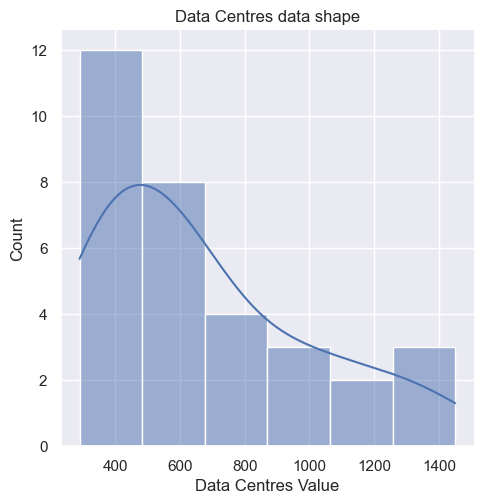

In [32]:
# Visualizing the Data Centres variable
# It can be seen that data is positive skewed in this feature.
sns.set(rc={"figure.figsize":(4, 1)})
sns.displot(data=Data_Centers, x="Data Centres Value", kde=True);
plt.title("Data Centres data shape");

## 1.3. Outliers Detection.

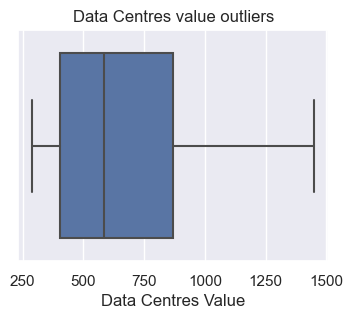

In [33]:
# Detecting Outliers
# As it can be seen below, there are ouliers in three of the numeric variables of my dataset.
sns.set(rc={"figure.figsize":(4, 3)})
sns.boxplot(x=Data_Centers['Data Centres Value']); 
plt.title("Data Centres value outliers");

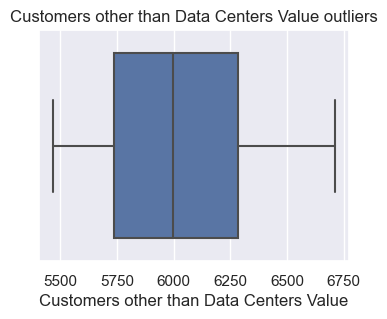

In [34]:
# Detecting Outliers on Residential variable
# As it can be seen below, there are ouliers in three of the numeric variables of my dataset.
sns.set(rc={"figure.figsize":(4, 3)})
sns.boxplot(x=Data_Centers['Customers other than Data Centers Value']); 
plt.title("Customers other than Data Centers Value outliers");

## 1.4. Interactive Visualization using Plotly

In [35]:
#Importing the libraries
import plotly.express as plt
import plotly.graph_objects as go
import plotly.express as px

In [36]:
#Determining a mix
xmin, xmax = min('Data_Centers.Data Centres Value'), max('Data_Centers.Data Centres Value')
ymin, ymax = min('Data_Centers.Customers other than Data Centers Value'), max('Data_Centers.Customers other than Data Centers Value')

In [37]:
#Visualizing the interactive dashboard
#fig = px.scatter(Data_Centers, x="Data Centres Value", y="Customers other than Data Centers Value", animation_frame="Quarter",
#animation_group="Data Centres Value", color="Quarter", hover_name="Quarter",
#facet_col="Quarter", width=1200, height=400, log_x=True, size_max=45,
#range_x=[xmin,xmax], range_y=[ymin,ymax]) 
#fig.show()